In [24]:
import tensorflow as tf

print(tf.config.list_physical_devices('GPU')) 

[]


In [4]:
import numpy as np
import nibabel as nib
import glob
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tifffile import imsave

from sklearn.preprocessing import MinMaxScaler

In [3]:
pip install nibabel

   ---------------------------------------- 0.0/3.3 MB ? eta -:--:--
   ------------------------- -------------- 2.1/3.3 MB 11.8 MB/s eta 0:00:01
   ---------------------------------------- 3.3/3.3 MB 11.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
scaler = MinMaxScaler()

In [6]:
TRAIN_DATASET_PATH = 'C:/Users/conne/Downloads/BRATS/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/'

In [7]:
test_image_flair=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_flair.nii').get_fdata()
print(test_image_flair.max())

1854.603271484375


In [8]:
test_image_flair=scaler.fit_transform(test_image_flair.reshape(-1, test_image_flair.shape[-1])).reshape(test_image_flair.shape)

In [9]:
print(test_image_flair.max())

1.0


In [10]:
test_image_t1=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_t1.nii').get_fdata()
test_image_t1=scaler.fit_transform(test_image_t1.reshape(-1, test_image_t1.shape[-1])).reshape(test_image_t1.shape)

test_image_t1ce=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_t1ce.nii').get_fdata()
test_image_t1ce=scaler.fit_transform(test_image_t1ce.reshape(-1, test_image_t1ce.shape[-1])).reshape(test_image_t1ce.shape)

test_image_t2=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_t2.nii').get_fdata()
test_image_t2=scaler.fit_transform(test_image_t2.reshape(-1, test_image_t2.shape[-1])).reshape(test_image_t2.shape)

In [11]:
test_mask=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_seg.nii').get_fdata()
test_mask=test_mask.astype(np.uint8)

In [12]:
print(np.unique(test_mask))
test_mask[test_mask==4] = 3 
print(np.unique(test_mask))

[0 1 2 4]
[0 1 2 3]


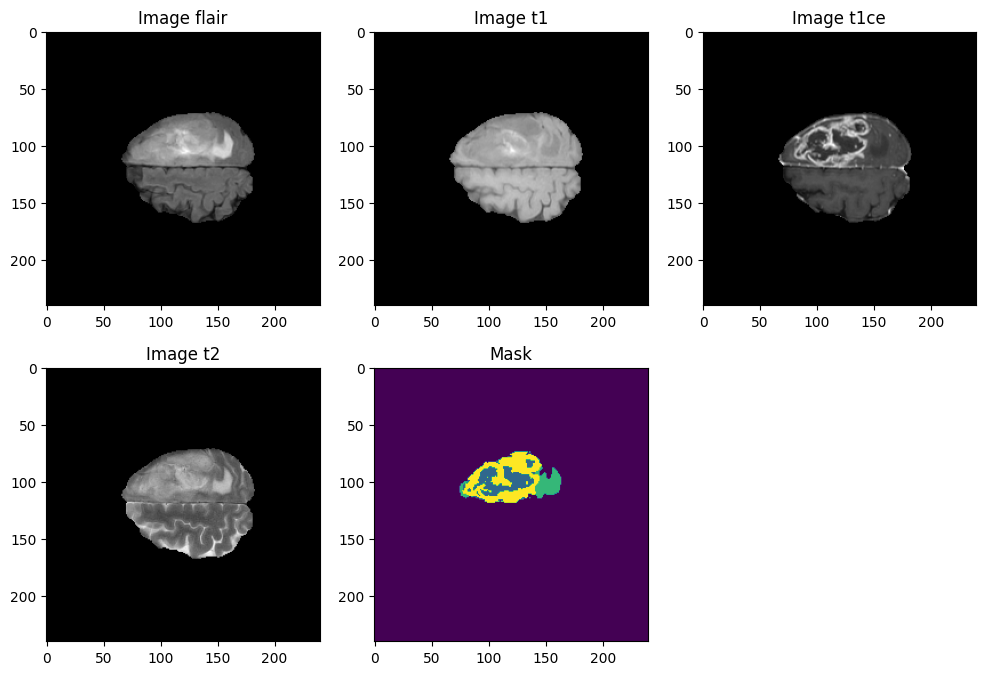

In [16]:
import random
n_slice=random.randint(0, test_mask.shape[2])

plt.figure(figsize=(12, 8))

plt.subplot(231)
plt.imshow(test_image_flair[:,:,n_slice], cmap='gray')
plt.title('Image flair')
plt.subplot(232)
plt.imshow(test_image_t1[:,:,n_slice], cmap='gray')
plt.title('Image t1')
plt.subplot(233)
plt.imshow(test_image_t1ce[:,:,n_slice], cmap='gray')
plt.title('Image t1ce')
plt.subplot(234)
plt.imshow(test_image_t2[:,:,n_slice], cmap='gray')
plt.title('Image t2')
plt.subplot(235)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [17]:
combined_x = np.stack([test_image_flair, test_image_t1ce, test_image_t2], axis=3)

combined_x=combined_x[56:184, 56:184, 13:141]
test_mask = test_mask[56:184, 56:184, 13:141]

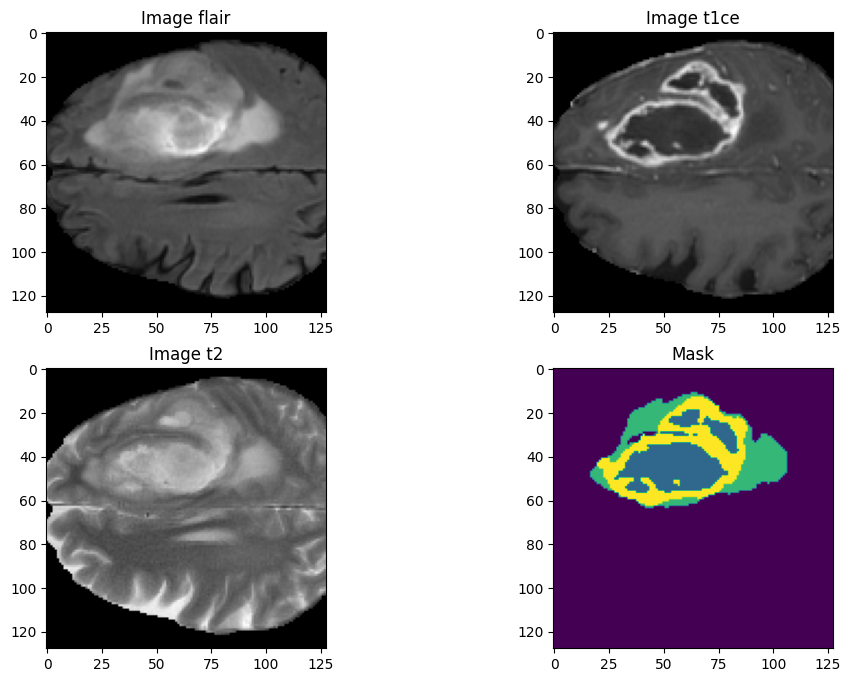

In [18]:
n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(combined_x[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(combined_x[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(combined_x[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [19]:
test_mask = to_categorical(test_mask, num_classes=4)

In [20]:
test_mask.shape

(128, 128, 128, 4)

In [21]:
t2_list = sorted(glob.glob('C:/Users/conne/Downloads/BRATS/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*t2.nii'))
t1ce_list = sorted(glob.glob('C:/Users/conne/Downloads/BRATS/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*t1ce.nii'))
flair_list = sorted(glob.glob('C:/Users/conne/Downloads/BRATS/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*flair.nii'))
mask_list = sorted(glob.glob('C:/Users/conne/Downloads/BRATS/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*seg.nii'))

In [22]:
len(flair_list)

369

In [25]:
for img in range(len(t2_list)):
    print("Now preparing image and masks number: ", img)
      
    temp_image_t2=nib.load(t2_list[img]).get_fdata()
    temp_image_t2=scaler.fit_transform(temp_image_t2.reshape(-1, temp_image_t2.shape[-1])).reshape(temp_image_t2.shape)
   
    temp_image_t1ce=nib.load(t1ce_list[img]).get_fdata()
    temp_image_t1ce=scaler.fit_transform(temp_image_t1ce.reshape(-1, temp_image_t1ce.shape[-1])).reshape(temp_image_t1ce.shape)
   
    temp_image_flair=nib.load(flair_list[img]).get_fdata()
    temp_image_flair=scaler.fit_transform(temp_image_flair.reshape(-1, temp_image_flair.shape[-1])).reshape(temp_image_flair.shape)
        
    temp_mask=nib.load(mask_list[img]).get_fdata()
    temp_mask=temp_mask.astype(np.uint8)
    temp_mask[temp_mask==4] = 3

    
    
    temp_combined_images = np.stack([temp_image_flair, temp_image_t1ce, temp_image_t2], axis=3)
    temp_combined_images=temp_combined_images[56:184, 56:184, 13:141]
    temp_mask = temp_mask[56:184, 56:184, 13:141]
    
    val, counts = np.unique(temp_mask, return_counts=True)
    
    if (1 - (counts[0]/counts.sum())) > 0.01:
        print("Save Me")
        temp_mask= to_categorical(temp_mask, num_classes=4)
        np.save('C:/Users/conne/Downloads/BRATS/input_data_3_channels/images/image_'+str(img)+'.npy', temp_combined_images)
        np.save('C:/Users/conne/Downloads/BRATS/input_data_3_channels/masks/mask_'+str(img)+'.npy', temp_mask)
        
    else:
        print("I am useless")   

Now preparing image and masks number:  0
Save Me
Now preparing image and masks number:  1
Save Me
Now preparing image and masks number:  2
Save Me
Now preparing image and masks number:  3
Save Me
Now preparing image and masks number:  4
I am useless
Now preparing image and masks number:  5
Save Me
Now preparing image and masks number:  6
Save Me
Now preparing image and masks number:  7
Save Me
Now preparing image and masks number:  8
Save Me
Now preparing image and masks number:  9
Save Me
Now preparing image and masks number:  10
Save Me
Now preparing image and masks number:  11
Save Me
Now preparing image and masks number:  12
Save Me
Now preparing image and masks number:  13
Save Me
Now preparing image and masks number:  14
Save Me
Now preparing image and masks number:  15
Save Me
Now preparing image and masks number:  16
Save Me
Now preparing image and masks number:  17
Save Me
Now preparing image and masks number:  18
Save Me
Now preparing image and masks number:  19
Save Me
Now p

In [29]:
pip install --upgrade pip


   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----------- ---------------------------- 0.5/1.8 MB 1.3 MB/s eta 0:00:02
   ----------------- ---------------------- 0.8/1.8 MB 1.5 MB/s eta 0:00:01
   ----------------------- ---------------- 1.0/1.8 MB 1.4 MB/s eta 0:00:01
   ---------------------------- ----------- 1.3/1.8 MB 1.6 MB/s eta 0:00:01
   ---------------------------------- ----- 1.6/1.8 MB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 1.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.2
    Uninstalling pip-24.2:
      Successfully uninstalled pip-24.2


In [31]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [32]:
import splitfolders

input_folder = 'C:/Users/conne/Downloads/BRATS/input_data_3_channels/'
output_folder = 'C:/Users/conne/Downloads/BRATS/input_128/'

splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.75, .25), group_prefix=None)

In [4]:
import os
import numpy as np

In [5]:
def load_img(img_dir, img_list):
    images=[]
    for i, image_name in enumerate(img_list):    
        if (image_name.split('.')[1] == 'npy'):
            
            image = np.load(img_dir+image_name)
                      
            images.append(image)
    images = np.array(images)
    
    return(images)

In [6]:
def imageLoader(img_dir, img_list, mask_dir, mask_list, batch_size):

    L = len(img_list) 
    while True:

        batch_start = 0
        batch_end = batch_size

        while batch_start < L:
            limit = min(batch_end, L)
                       
            X = load_img(img_dir, img_list[batch_start:limit])
            Y = load_img(mask_dir, mask_list[batch_start:limit])

            yield (X.astype(np.float32),Y.astype(np.float32))   

            batch_start += batch_size   
            batch_end += batch_size

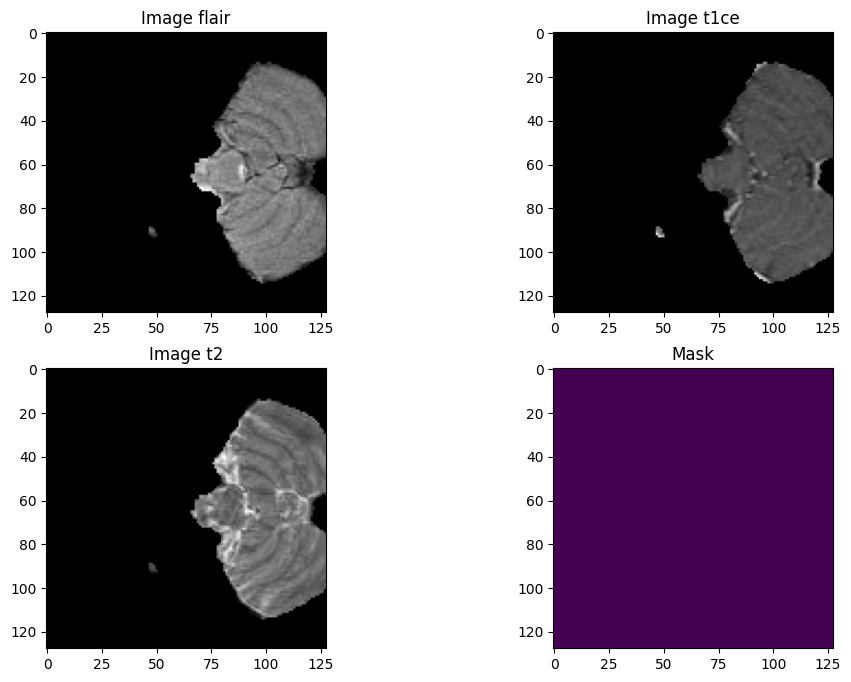

In [7]:
from matplotlib import pyplot as plt
import random

train_image_path = "C:/Users/conne/Downloads/BRATS/input_128/train/images/"
train_msk_path = "C:/Users/conne/Downloads/BRATS/input_128/train/masks/"

train_image_list=os.listdir(train_image_path)
train_msk_list = os.listdir(train_msk_path)

batch_size = 2

train_img_datagen = imageLoader(train_image_path, train_image_list, 
                                train_msk_path, train_msk_list, batch_size)
img, msk = train_img_datagen.__next__()


img_num = random.randint(0,img.shape[0]-1)
test_img=img[img_num]
test_mask=msk[img_num]
test_mask=np.argmax(test_mask, axis=3)

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [8]:
img_samples = load_img(train_image_path, train_image_list[:5])
print(f"Loaded images shape: {img_samples.shape}")


Loaded images shape: (5, 128, 128, 128, 3)


In [9]:
val_image_path = "C:/Users/conne/Downloads/BRATS/input_128/val/images/"
val_mask_path = "C:/Users/conne/Downloads/BRATS/input_128/val/masks/"

val_image_list=os.listdir(val_image_path)
val_msk_list = os.listdir(val_mask_path)

val_img_datagen = imageLoader(val_image_path, val_image_list, 
                                val_mask_path, val_msk_list, batch_size)

In [46]:
msk_samples = load_img(train_msk_path, train_msk_list[:5])
print(f"Loaded masks shape: {msk_samples.shape}")


Loaded masks shape: (5, 128, 128, 128, 4)


In [47]:
train_batch = next(train_img_datagen)
print(f"Train batch images shape: {train_batch[0].shape}")
print(f"Train batch masks shape: {train_batch[1].shape}")


Train batch images shape: (2, 128, 128, 128, 3)
Train batch masks shape: (2, 128, 128, 128, 4)


In [48]:
print(f"Image min: {train_batch[0].min()}, max: {train_batch[0].max()}")
print(f"Mask min: {train_batch[1].min()}, max: {train_batch[1].max()}")


Image min: 0.0, max: 1.0
Mask min: 0.0, max: 1.0


In [49]:
for i in range(5):
    train_batch = next(train_img_datagen)
    print(f"Batch {i+1} - Images shape: {train_batch[0].shape}, Masks shape: {train_batch[1].shape}")


Batch 1 - Images shape: (2, 128, 128, 128, 3), Masks shape: (2, 128, 128, 128, 4)
Batch 2 - Images shape: (2, 128, 128, 128, 3), Masks shape: (2, 128, 128, 128, 4)
Batch 3 - Images shape: (2, 128, 128, 128, 3), Masks shape: (2, 128, 128, 128, 4)
Batch 4 - Images shape: (2, 128, 128, 128, 3), Masks shape: (2, 128, 128, 128, 4)
Batch 5 - Images shape: (2, 128, 128, 128, 3), Masks shape: (2, 128, 128, 128, 4)


In [50]:
train_batch = next(train_img_datagen)
print(f"Images batch shape: {train_batch[0].shape}, Masks batch shape: {train_batch[1].shape}")

assert train_batch[0].shape[1:] == (128, 128, 128, 3), "Image shape mismatch!"
assert train_batch[1].shape[1:] == (128, 128, 128, 4), "Mask shape mismatch!"


Images batch shape: (2, 128, 128, 128, 3), Masks batch shape: (2, 128, 128, 128, 4)


In [10]:
pip install --upgrade tensorflow keras


  Using cached keras-3.7.0-py3-none-any.whl.metadata (5.8 kB)
Using cached keras-3.7.0-py3-none-any.whl (1.2 MB)
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
segmentation-models-3d 1.1.1 requires keras==3.3.3, but you have keras 3.7.0 which is incompatible.


In [11]:
#Build the Simple 3D Unet Model
import keras
from keras.models import Model
from keras.layers import Input, Conv3D, MaxPooling3D, concatenate, Conv3DTranspose, BatchNormalization, Dropout, Lambda
from keras.optimizers import Adam
from keras.metrics import MeanIoU

ImportError: cannot import name '_saturate_cast' from 'keras.src.ops.core' (c:\Users\conne\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\core.py)

In [53]:
kernel_initializer =  'he_uniform'

def simple_unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS, num_classes):
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS))
    s = inputs

    #Contraction path
    c1 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(s)
    c1 = Dropout(0.1)(c1)
    c1 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c1)
    p1 = MaxPooling3D((2, 2, 2))(c1)
    
    c2 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c2)
    p2 = MaxPooling3D((2, 2, 2))(c2)
     
    c3 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c3)
    p3 = MaxPooling3D((2, 2, 2))(c3)
     
    c4 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c4)
    p4 = MaxPooling3D(pool_size=(2, 2, 2))(c4)
     
    c5 = Conv3D(256, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv3D(256, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c5)
    
    #Expansive path 
    u6 = Conv3DTranspose(128, (2, 2, 2), strides=(2, 2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c6)
     
    u7 = Conv3DTranspose(64, (2, 2, 2), strides=(2, 2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c7)
     
    u8 = Conv3DTranspose(32, (2, 2, 2), strides=(2, 2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c8)
     
    u9 = Conv3DTranspose(16, (2, 2, 2), strides=(2, 2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1])
    c9 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c9)
     
    outputs = Conv3D(num_classes, (1, 1, 1), activation='softmax')(c9)
     
    model = Model(inputs=[inputs], outputs=[outputs]) 
    model.summary()
    
    return model

model = simple_unet_model(128, 128, 128, 3, 4)
print(model.input_shape)
print(model.output_shape)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 128, 3)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d (Conv3D)     │ (None, 128, 128,  │      1,312 │ input_layer[0][0] │
│                     │ 128, 16)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128, 128,  │          0 │ conv3d[0][0]      │
│                     │ 128, 16)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_1 (Conv3D)   │ (None, 128, 128,  │      6,928 │ dropout[0][0]     │
│                     │ 128, 16)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d       │ (None, 64, 64,    │          0 │ conv3d_1[0][0]    │
│ (MaxPooling3D)      │ 64, 16)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_2 (Conv3D)   │ (None, 64, 64,    │     13,856 │ max_pooling3d[0]… │
│                     │ 64, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64, 64,    │          0 │ conv3d_2[0][0]    │
│                     │ 64, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_3 (Conv3D)   │ (None, 64, 64,    │     27,680 │ dropout_1[0][0]   │
│                     │ 64, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_1     │ (None, 32, 32,    │          0 │ conv3d_3[0][0]    │
│ (MaxPooling3D)      │ 32, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_4 (Conv3D)   │ (None, 32, 32,    │     55,360 │ max_pooling3d_1[… │
│                     │ 32, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 32, 32,    │          0 │ conv3d_4[0][0]    │
│                     │ 32, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_5 (Conv3D)   │ (None, 32, 32,    │    110,656 │ dropout_2[0][0]   │
│                     │ 32, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_2     │ (None, 16, 16,    │          0 │ conv3d_5[0][0]    │
│ (MaxPooling3D)      │ 16, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_6 (Conv3D)   │ (None, 16, 16,    │    221,312 │ max_pooling3d_2[… │
│                     │ 16, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 16, 16,    │          0 │ conv3d_6[0][0]    │
│                     │ 16, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_7 (Conv3D)   │ (None, 16, 16,    │    442,496 │ dropout_3[0][0]   │
│                     │ 16, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_3     │ (None, 8, 8, 8,   │          0 │ conv3d_7[0][0]  

 Total params: 5,645,828 (21.54 MB)

 Trainable params: 5,645,828 (21.54 MB)

 Non-trainable params: 0 (0.00 B)

(None, 128, 128, 128, 3)
(None, 128, 128, 128, 4)


In [14]:
pip install segmentation-models-3D


  Using cached keras-3.3.3-py3-none-any.whl.metadata (5.7 kB)
Using cached keras-3.3.3-py3-none-any.whl (1.1 MB)
  Attempting uninstall: keras
    Found existing installation: keras 3.7.0
    Uninstalling keras-3.7.0:
      Successfully uninstalled keras-3.7.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.18.0 requires keras>=3.5.0, but you have keras 3.3.3 which is incompatible.


In [15]:
import segmentation_models_3D as sm

Segmentation Models: using `keras` framework.


In [16]:
wt0, wt1, wt2, wt3 = 0.25,0.25,0.25,0.25
dice_loss = sm.losses.DiceLoss(class_weights=np.array([wt0, wt1, wt2, wt3])) 
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

metrics = ['accuracy', sm.metrics.IOUScore(threshold=0.5)]

LR = 0.0001
optim = keras.optimizers.Adam(LR)

In [17]:
steps_per_epoch = len(train_image_list)//batch_size
val_steps_per_epoch = len(val_image_list)//batch_size

In [60]:
model = simple_unet_model(IMG_HEIGHT=128, 
                          IMG_WIDTH=128, 
                          IMG_DEPTH=128, 
                          IMG_CHANNELS=3, 
                          num_classes=4)

model.compile(optimizer = optim, loss=total_loss, metrics=metrics)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 128, 3)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_19 (Conv3D)  │ (None, 128, 128,  │      1,312 │ input_layer_1[0]… │
│                     │ 128, 16)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 128, 128,  │          0 │ conv3d_19[0][0]   │
│                     │ 128, 16)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_20 (Conv3D)  │ (None, 128, 128,  │      6,928 │ dropout_9[0][0]   │
│                     │ 128, 16)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_4     │ (None, 64, 64,    │          0 │ conv3d_20[0][0]   │
│ (MaxPooling3D)      │ 64, 16)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_21 (Conv3D)  │ (None, 64, 64,    │     13,856 │ max_pooling3d_4[… │
│                     │ 64, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_10          │ (None, 64, 64,    │          0 │ conv3d_21[0][0]   │
│ (Dropout)           │ 64, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_22 (Conv3D)  │ (None, 64, 64,    │     27,680 │ dropout_10[0][0]  │
│                     │ 64, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_5     │ (None, 32, 32,    │          0 │ conv3d_22[0][0]   │
│ (MaxPooling3D)      │ 32, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_23 (Conv3D)  │ (None, 32, 32,    │     55,360 │ max_pooling3d_5[… │
│                     │ 32, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_11          │ (None, 32, 32,    │          0 │ conv3d_23[0][0]   │
│ (Dropout)           │ 32, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_24 (Conv3D)  │ (None, 32, 32,    │    110,656 │ dropout_11[0][0]  │
│                     │ 32, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_6     │ (None, 16, 16,    │          0 │ conv3d_24[0][0]   │
│ (MaxPooling3D)      │ 16, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_25 (Conv3D)  │ (None, 16, 16,    │    221,312 │ max_pooling3d_6[… │
│                     │ 16, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_12          │ (None, 16, 16,    │          0 │ conv3d_25[0][0]   │
│ (Dropout)           │ 16, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_26 (Conv3D)  │ (None, 16, 16,    │    442,496 │ dropout_12[0][0]  │
│                     │ 16, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_7     │ (None, 8, 8, 8,   │          0 │ conv3d_26[0][0] 

 Total params: 5,645,828 (21.54 MB)

 Trainable params: 5,645,828 (21.54 MB)

 Non-trainable params: 0 (0.00 B)

In [61]:
history=model.fit(train_img_datagen,
          steps_per_epoch=steps_per_epoch,
          epochs=10,
          verbose=1,
          validation_data=val_img_datagen,
          validation_steps=val_steps_per_epoch,
          )

model.save('brats_3d_unet.hdf5')

Epoch 1/10


c:\Users\conne\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_41']. Received: the structure of inputs=*
  return output_shapes[0]


129/129 ━━━━━━━━━━━━━━━━━━━━ 627s 5s/step - accuracy: 0.6801 - iou_score: 0.0977 - loss: 0.9881 - val_accuracy: 0.9503 - val_iou_score: 0.2377 - val_loss: 0.9375
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 617s 5s/step - accuracy: 0.9486 - iou_score: 0.2258 - loss: 0.9370 - val_accuracy: 0.9199 - val_iou_score: 0.2297 - val_loss: 0.9329
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 705s 5s/step - accuracy: 0.9450 - iou_score: 0.2643 - loss: 0.9245 - val_accuracy: 0.9420 - val_iou_score: 0.3089 - val_loss: 0.9127
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 651s 5s/step - accuracy: 0.9444 - iou_score: 0.3197 - loss: 0.9107 - val_accuracy: 0.9348 - val_iou_score: 0.3640 - val_loss: 0.9054
Epoch 5/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 614s 5s/step - accuracy: 0.9478 - iou_score: 0.3792 - loss: 0.8992 - val_accuracy: 0.9467 - val_iou_score: 0.4106 - val_loss: 0.8944
Epoch 6/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 627s 5s/step - accuracy: 0.9503 - iou_score: 0.4108 - loss: 0.8897 - val_accuracy: 0.9451 - val_iou_score:

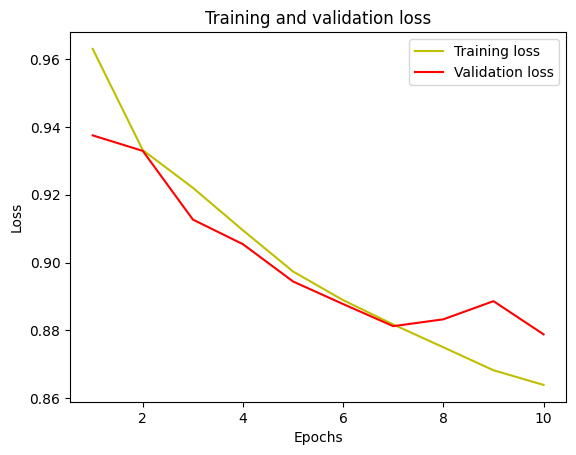

In [65]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

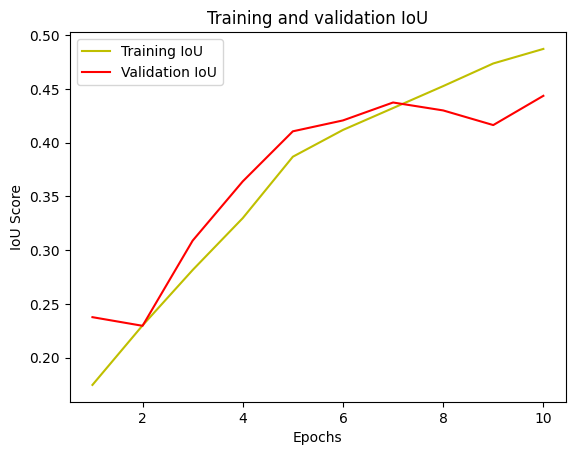

In [67]:
iou_score_result = history.history['iou_score']
val_iou = history.history['val_iou_score']
epochs = range(1, len(iou_score_result) + 1)
plt.plot(epochs, iou_score_result, 'y', label='Training IoU')
plt.plot(epochs, val_iou, 'r', label='Validation IoU')
plt.title('Training and validation IoU')
plt.xlabel('Epochs')
plt.ylabel('IoU Score')
plt.legend()
plt.show()

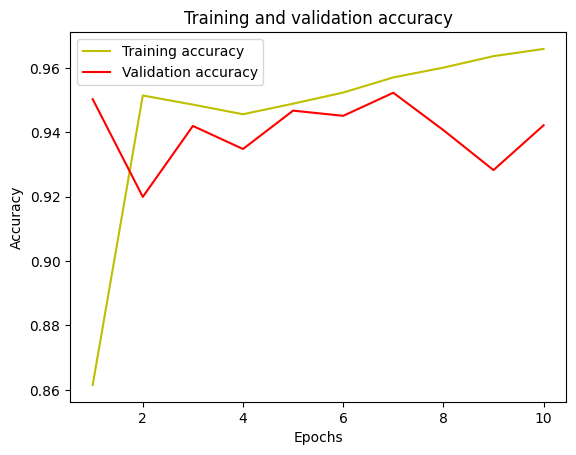

In [66]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [69]:
from keras.models import load_model

my_model = load_model('C:/Users/conne/Downloads/BRATS/brats_3d_unet.hdf5', 
                      compile=False)

In [70]:
from keras.metrics import MeanIoU

batch_size=8 #Check IoU for a batch of images
test_img_datagen = imageLoader(val_image_path, val_image_list, 
                                val_mask_path, val_msk_list, batch_size)

#Verify generator.... In python 3 next() is renamed as __next__()
test_image_batch, test_mask_batch = test_img_datagen.__next__()

test_mask_batch_argmax = np.argmax(test_mask_batch, axis=4)
test_pred_batch = my_model.predict(test_image_batch)
test_pred_batch_argmax = np.argmax(test_pred_batch, axis=4)

n_classes = 4
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(test_pred_batch_argmax, test_mask_batch_argmax)
print("Mean IoU =", IOU_keras.result().numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
Mean IoU = 0.5653444


In [50]:
img_num = 100

test_img = np.load("C:/Users/conne/Downloads/BRATS/input_128/val/images/image_"+str(img_num)+".npy")

test_mask = np.load("C:/Users/conne/Downloads/BRATS/input_128/val/masks/mask_"+str(img_num)+".npy")
test_mask_argmax=np.argmax(test_mask, axis=3)

test_img_input = np.expand_dims(test_img, axis=0)
test_prediction = my_model.predict(test_img_input)
test_prediction_argmax=np.argmax(test_prediction, axis=4)[0,:,:,:]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 949ms/step


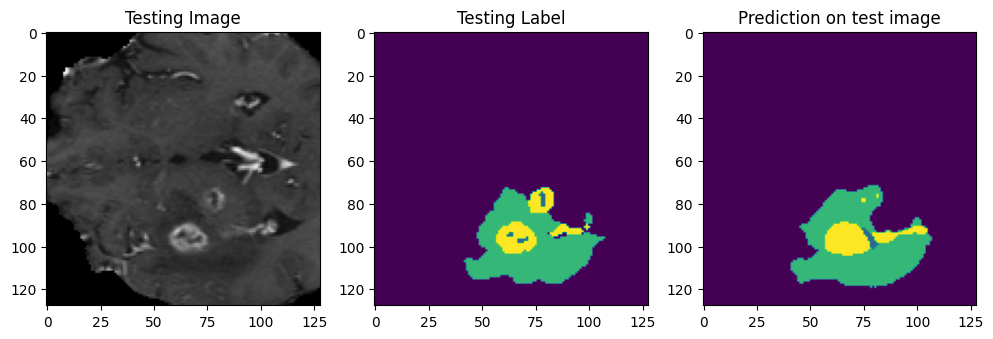

In [51]:
n_slice = 55
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,n_slice,1], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(test_mask_argmax[:,:,n_slice])
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(test_prediction_argmax[:,:, n_slice])
plt.show()

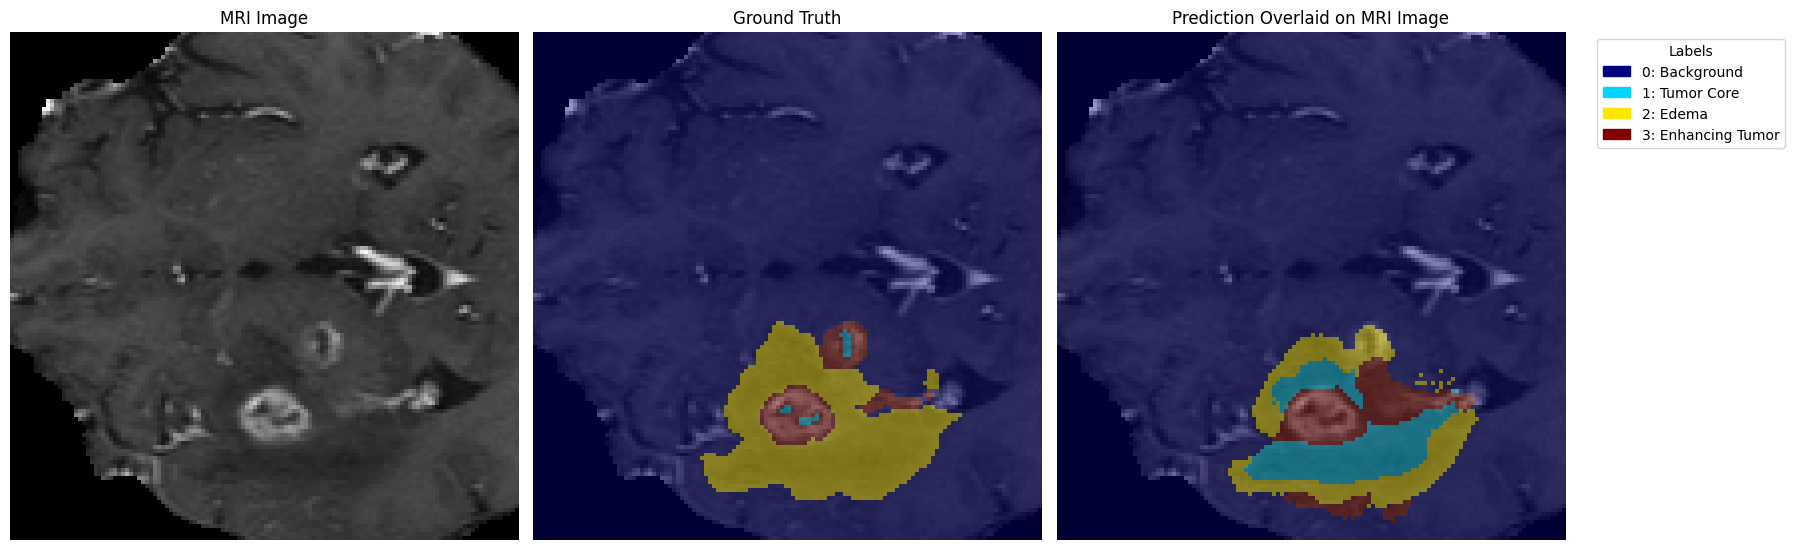

In [110]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# Define label-to-color mapping (example)
class_labels = {
    0: 'Background',
    1: 'Tumor Core',
    2: 'Edema',
    3: 'Enhancing Tumor'
}

# Define colors based on the colormap (e.g., 'jet')
color_map = plt.cm.jet(np.linspace(0, 1, len(class_labels)))

# Choose a valid slice index
n_slice = 55  # Replace with your desired slice index

# Visualization
plt.figure(figsize=(18, 6))

# 1. Display the MRI image
plt.subplot(131)
plt.title('MRI Image')
plt.imshow(test_img[:, :, n_slice, 1], cmap='gray')  # Grayscale MRI image
plt.axis('off')

# 2. Display the Ground Truth Mask
plt.subplot(132)
plt.title('Ground Truth')
plt.imshow(test_img[:, :, n_slice, 1], cmap='gray')  # Grayscale MRI image
plt.imshow(test_mask_argmax[:, :, n_slice], cmap='jet', alpha=0.4)  # Ground truth mask overlay
plt.axis('off')

# 3. Display the Prediction Mask Overlaid on the MRI Image
plt.subplot(133)
plt.title('Prediction Overlaid on MRI Image')
plt.imshow(test_img[:, :, n_slice, 1], cmap='gray')  # Grayscale MRI image
plt.imshow(test_prediction_argmax[:, :, n_slice], cmap='jet', alpha=0.4)  # Prediction mask overlay
plt.axis('off')

# Add legend for the labels
legend_patches = [mpatches.Patch(color=color_map[i], label=f"{key}: {label}") 
                  for i, (key, label) in enumerate(class_labels.items())]
plt.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left', title="Labels")

plt.tight_layout()
plt.show()


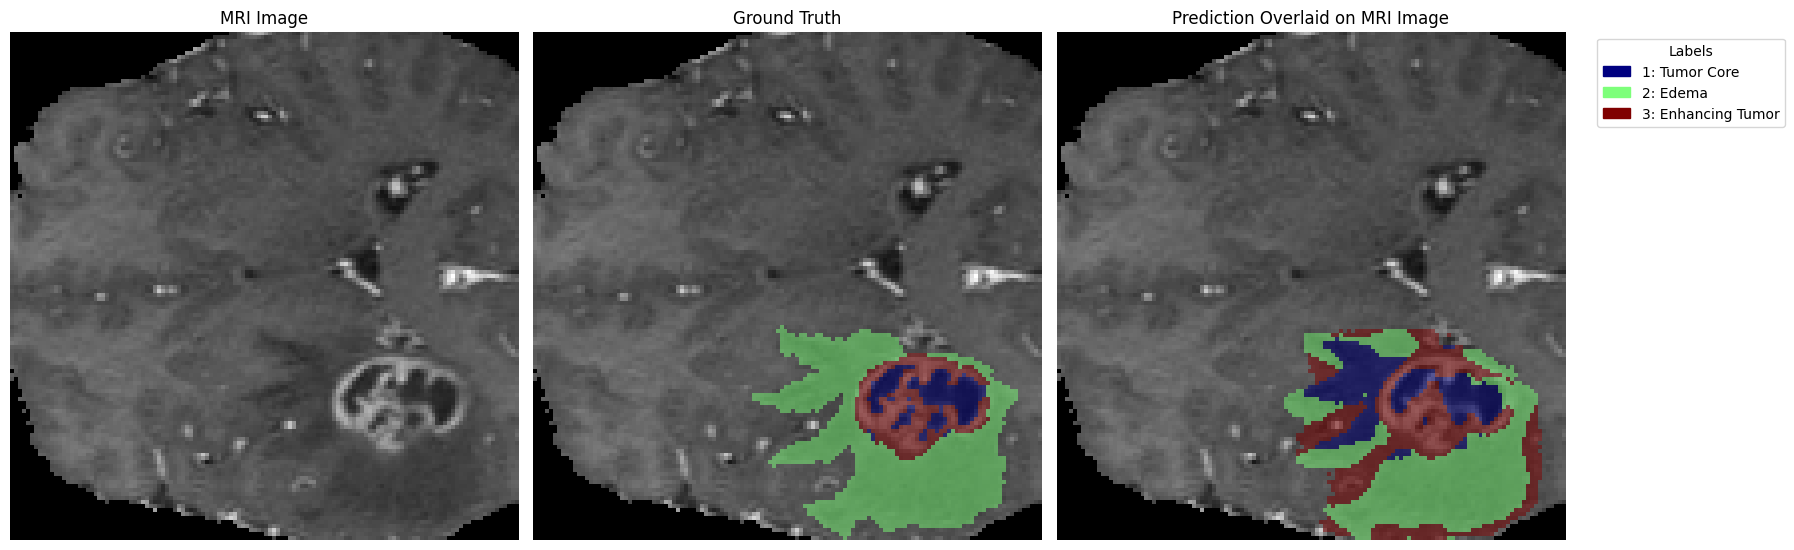

In [107]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# Define label-to-color mapping (excluding background)
class_labels = {
    1: 'Tumor Core',
    2: 'Edema',
    3: 'Enhancing Tumor'
}

# Define colors based on the colormap (e.g., 'jet')
color_map = plt.cm.jet(np.linspace(0, 1, len(class_labels)))

# Choose a valid slice index
n_slice = 55


plt.figure(figsize=(18, 6))

plt.subplot(131)
plt.title('MRI Image')
plt.imshow(test_img[:, :, n_slice, 1], cmap='gray') 
plt.axis('off')

plt.subplot(132)
plt.title('Ground Truth')
plt.imshow(test_img[:, :, n_slice, 1], cmap='gray') 
ground_truth_mask = np.where(test_mask_argmax[:, :, n_slice] > 0, test_mask_argmax[:, :, n_slice], np.nan)
plt.imshow(ground_truth_mask, cmap='jet', alpha=0.5)
plt.axis('off')


plt.subplot(133)
plt.title('Prediction Overlaid on MRI Image')
plt.imshow(test_img[:, :, n_slice, 1], cmap='gray') 
prediction_mask = np.where(test_prediction_argmax[:, :, n_slice] > 0, test_prediction_argmax[:, :, n_slice], np.nan)
plt.imshow(prediction_mask, cmap='jet', alpha=0.5) 
plt.axis('off')

legend_patches = [mpatches.Patch(color=color_map[i], label=f"{key}: {label}") 
                  for i, (key, label) in enumerate(class_labels.items())]
plt.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left', title="Labels")

plt.tight_layout()
plt.show()


In [112]:
history2=model.fit(train_img_datagen,
          steps_per_epoch=steps_per_epoch,
          epochs=30,
          verbose=1,
          validation_data=val_img_datagen,
          validation_steps=val_steps_per_epoch,
          )

model.save('brats_3d_unet_30epochs.hdf5')

Epoch 1/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 1765s 14s/step - accuracy: 0.9703 - iou_score: 0.5455 - loss: 0.8466 - val_accuracy: 0.9632 - val_iou_score: 0.5081 - val_loss: 0.8577
Epoch 2/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 2404s 19s/step - accuracy: 0.9713 - iou_score: 0.5625 - loss: 0.8414 - val_accuracy: 0.9642 - val_iou_score: 0.5172 - val_loss: 0.8552
Epoch 3/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 1340s 10s/step - accuracy: 0.9722 - iou_score: 0.5736 - loss: 0.8382 - val_accuracy: 0.9674 - val_iou_score: 0.5276 - val_loss: 0.8529
Epoch 4/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 1910s 15s/step - accuracy: 0.9729 - iou_score: 0.5860 - loss: 0.8350 - val_accuracy: 0.9665 - val_iou_score: 0.5326 - val_loss: 0.8517
Epoch 5/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 1162s 9s/step - accuracy: 0.9739 - iou_score: 0.5982 - loss: 0.8316 - val_accuracy: 0.9672 - val_iou_score: 0.5361 - val_loss: 0.8523
Epoch 6/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 710s 6s/step - accuracy: 0.9740 - iou_score: 0.6013 - loss: 0.8306 - val_accuracy: 0.9

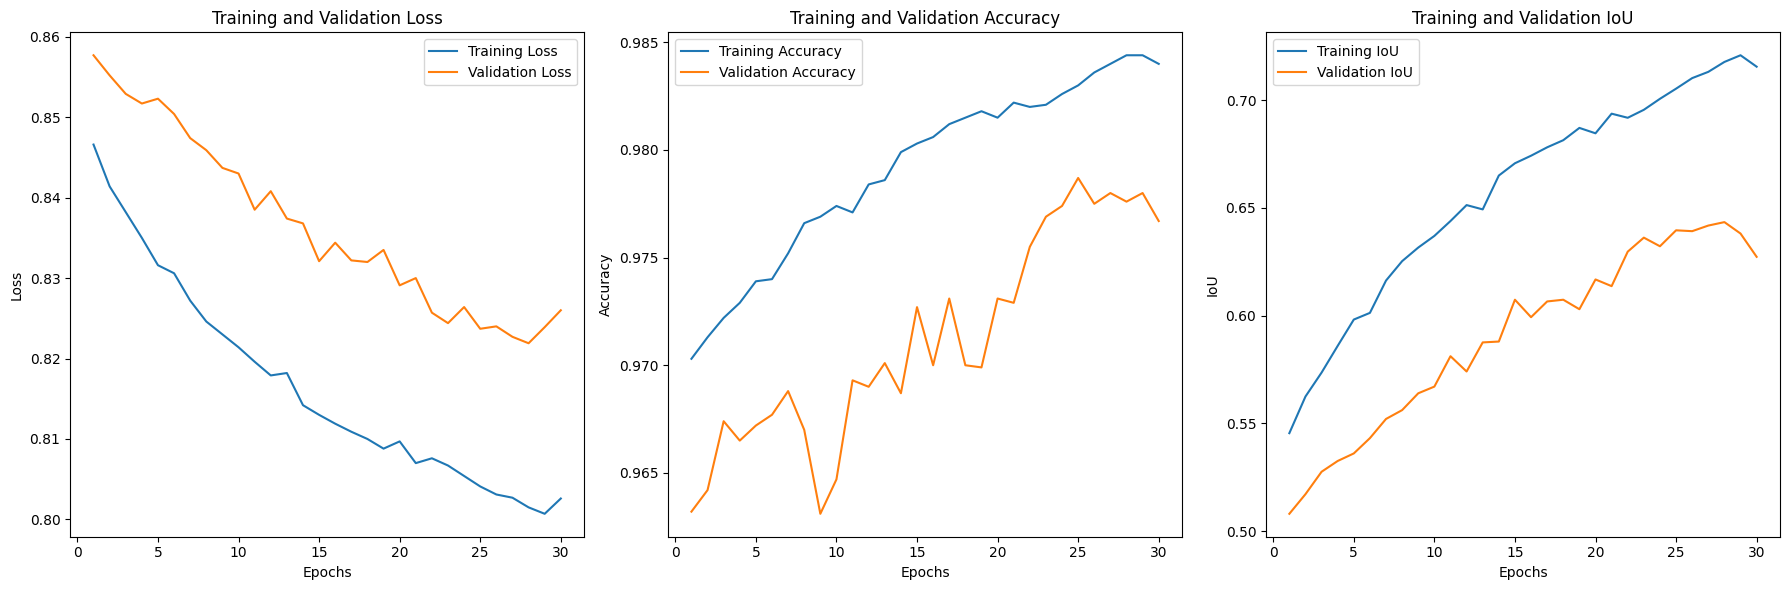

In [42]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

iou_score_result = history.history['iou_score']
val_iou = history.history['val_iou_score']

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(18, 6))

plt.subplot(1,3,1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.subplot(1,3,2)
plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Training and Validation IoU
plt.subplot(1,3,3)
plt.plot(epochs, iou_score_result, 'y', label='Training IoU')
plt.plot(epochs, val_iou, 'r', label='Validation IoU')
plt.title('Training and validation IoU')
plt.xlabel('Epochs')
plt.ylabel('IoU Score')
plt.legend()


plt.tight_layout()
plt.show()

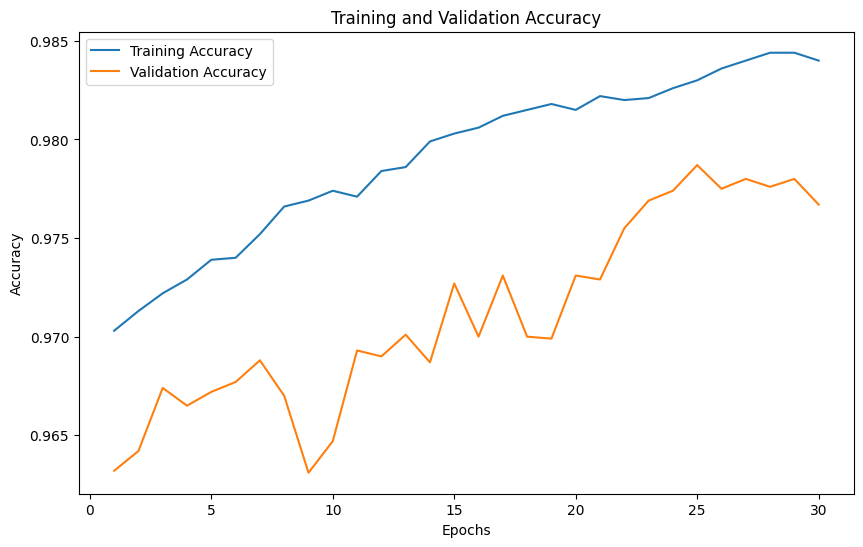

In [27]:
# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

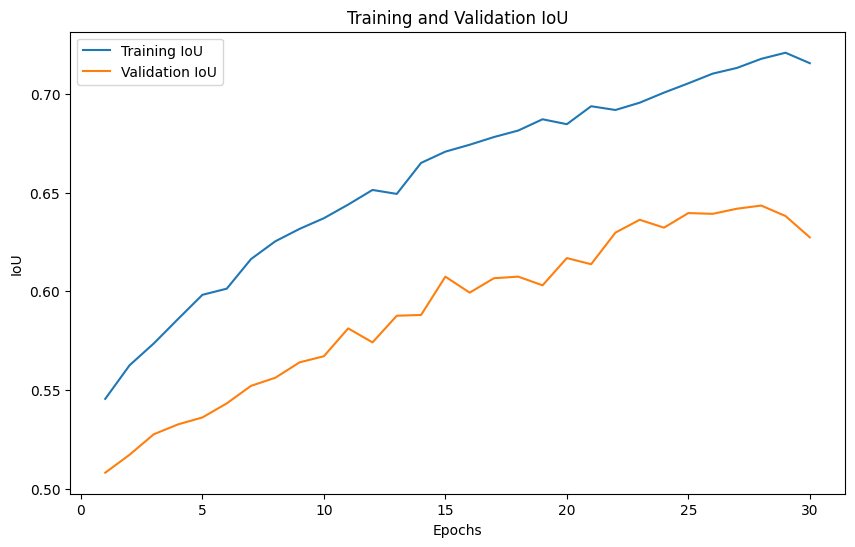

In [39]:
import matplotlib.pyplot as plt

# Manually enter the extracted IoU data
epochs = list(range(1, 31))  # From Epoch 1 to 30

train_iou = [
    0.5455, 0.5625, 0.5736, 0.5860, 0.5982, 0.6013, 0.6163, 0.6253, 0.6316, 0.6370,
    0.6439, 0.6513, 0.6493, 0.6650, 0.6707, 0.6742, 0.6781, 0.6814, 0.6871, 0.6846,
    0.6937, 0.6918, 0.6955, 0.7006, 0.7053, 0.7102, 0.7131, 0.7177, 0.7208, 0.7155
]
val_iou = [
    0.5081, 0.5172, 0.5276, 0.5326, 0.5361, 0.5432, 0.5521, 0.5562, 0.5640, 0.5671,
    0.5812, 0.5741, 0.5876, 0.5880, 0.6074, 0.5993, 0.6066, 0.6074, 0.6030, 0.6168,
    0.6137, 0.6297, 0.6362, 0.6322, 0.6396, 0.6392, 0.6418, 0.6434, 0.6381, 0.6273
]

# Plot Training and Validation IoU
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_iou, label='Training IoU')
plt.plot(epochs, val_iou, label='Validation IoU')
plt.title('Training and Validation IoU')
plt.xlabel('Epochs')
plt.ylabel('IoU')
plt.legend()
plt.show()


In [29]:
from keras.models import load_model

my_model_30 = load_model('C:/Users/conne/Downloads/BRATS/brats_3d_unet_30epochs.hdf5', 
                      compile=False)

In [ ]:
from keras.metrics import MeanIoU

batch_size=8
test_img_datagen = imageLoader(val_image_path, val_image_list, 
                                val_mask_path, val_msk_list, batch_size)

test_image_batch, test_mask_batch = test_img_datagen.__next__()

test_mask_batch_argmax = np.argmax(test_mask_batch, axis=4)
test_pred_batch = my_model_30.predict(test_image_batch)
test_pred_batch_argmax = np.argmax(test_pred_batch, axis=4)

n_classes = 4
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(test_pred_batch_argmax, test_mask_batch_argmax)
print("Mean IoU =", IOU_keras.result().numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Mean IoU = 0.80217856


In [36]:
img_num = 82

test_img = np.load("C:/Users/conne/Downloads/BRATS/input_128/val/images/image_"+str(img_num)+".npy")

test_mask = np.load("C:/Users/conne/Downloads/BRATS/input_128/val/masks/mask_"+str(img_num)+".npy")
test_mask_argmax=np.argmax(test_mask, axis=3)

test_img_input = np.expand_dims(test_img, axis=0)
test_prediction = my_model_30.predict(test_img_input)
test_prediction_argmax=np.argmax(test_prediction, axis=4)[0,:,:,:]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 974ms/step


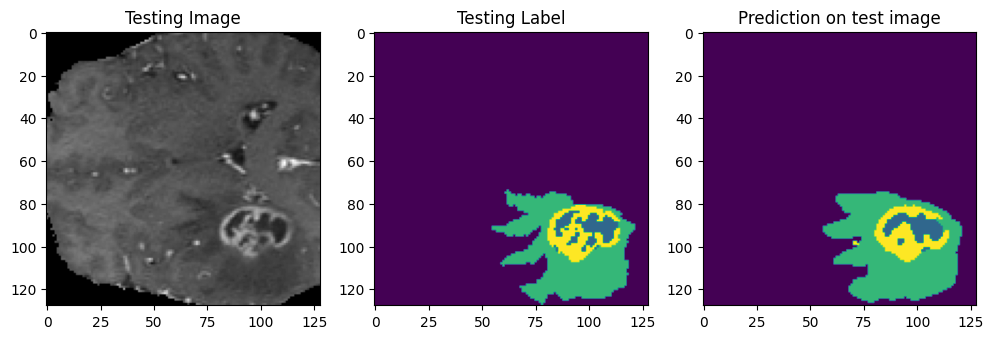

In [37]:
n_slice = 55
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,n_slice,1], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(test_mask_argmax[:,:,n_slice])
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(test_prediction_argmax[:,:, n_slice])
plt.show()

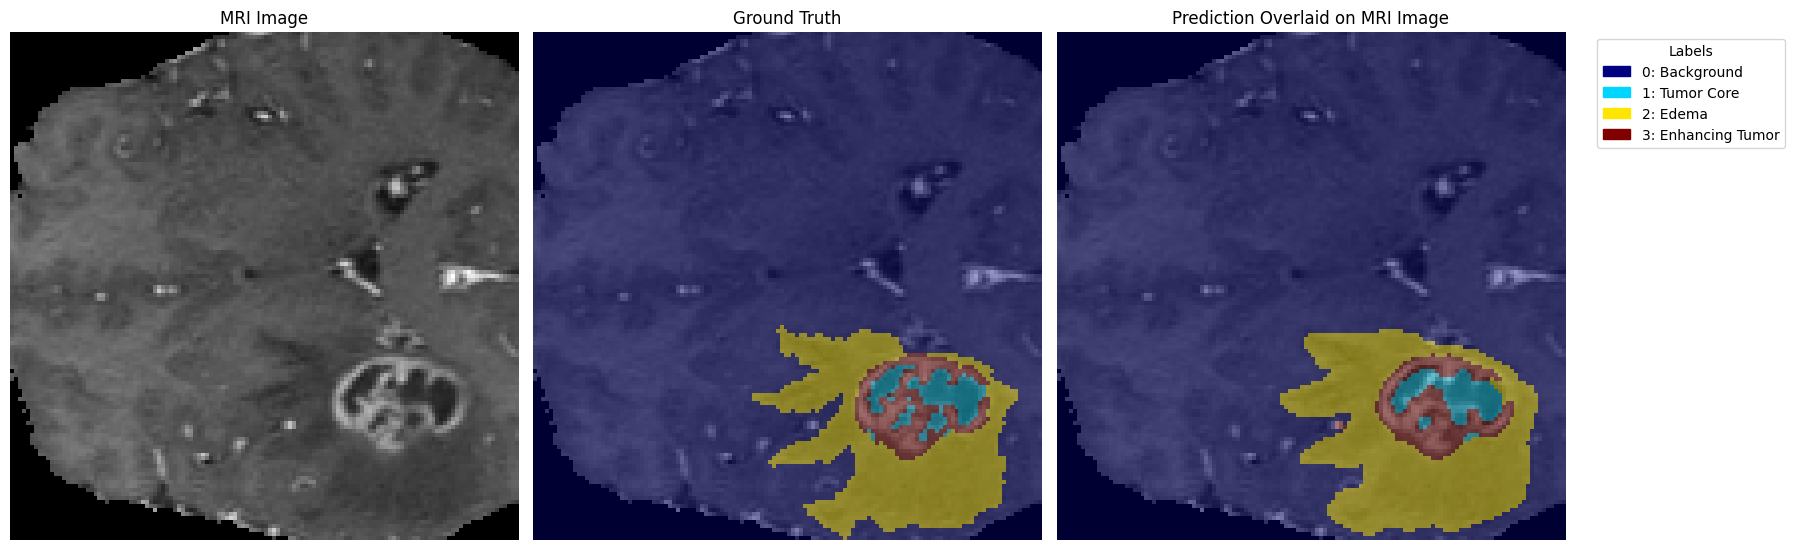

In [38]:
import matplotlib.patches as mpatches

# Define label-to-color mapping
class_labels = {
    0: 'Background',
    1: 'Tumor Core',
    2: 'Edema',
    3: 'Enhancing Tumor'
}

# Define colors based on the colormap 
color_map = plt.cm.jet(np.linspace(0, 1, len(class_labels)))

# Choose a valid slice index
n_slice = 55 

plt.figure(figsize=(18, 6))

plt.subplot(131)
plt.title('MRI Image')
plt.imshow(test_img[:, :, n_slice, 1], cmap='gray')
plt.axis('off')

plt.subplot(132)
plt.title('Ground Truth')
plt.imshow(test_img[:, :, n_slice, 1], cmap='gray')
plt.imshow(test_mask_argmax[:, :, n_slice], cmap='jet', alpha=0.4)
plt.axis('off')

plt.subplot(133)
plt.title('Prediction Overlaid on MRI Image')
plt.imshow(test_img[:, :, n_slice, 1], cmap='gray') 
plt.imshow(test_prediction_argmax[:, :, n_slice], cmap='jet', alpha=0.4)
plt.axis('off')

legend_patches = [mpatches.Patch(color=color_map[i], label=f"{key}: {label}") 
                  for i, (key, label) in enumerate(class_labels.items())]
plt.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left', title="Labels")

plt.tight_layout()
plt.show()

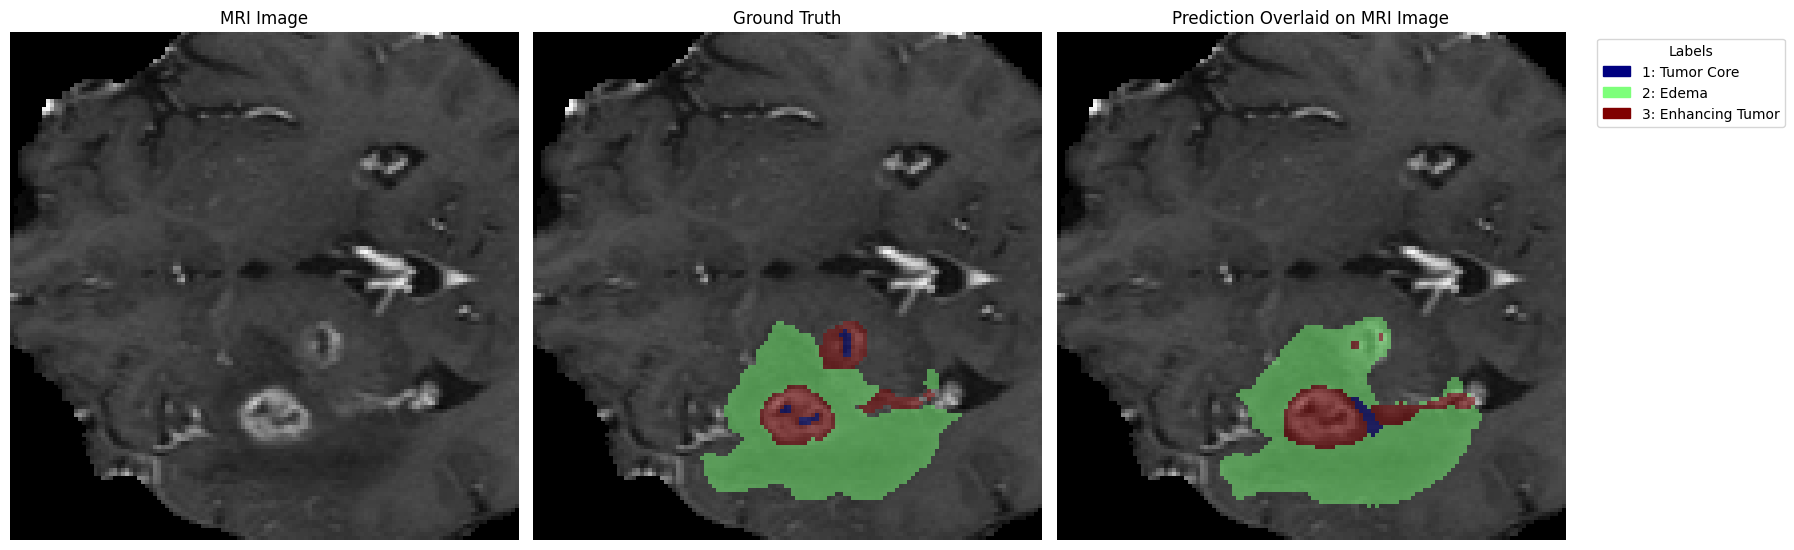

In [35]:
# Define label-to-color mapping (excluding background)
class_labels = {
    1: 'Tumor Core',
    2: 'Edema',
    3: 'Enhancing Tumor'
}

# Define colors based on the colormap 
color_map = plt.cm.jet(np.linspace(0, 1, len(class_labels)))

n_slice = 55 


plt.figure(figsize=(18, 6))

plt.subplot(131)
plt.title('MRI Image')
plt.imshow(test_img[:, :, n_slice, 1], cmap='gray')
plt.axis('off')

plt.subplot(132)
plt.title('Ground Truth')
plt.imshow(test_img[:, :, n_slice, 1], cmap='gray') 
ground_truth_mask = np.where(test_mask_argmax[:, :, n_slice] > 0, test_mask_argmax[:, :, n_slice], np.nan)
plt.imshow(ground_truth_mask, cmap='jet', alpha=0.5) 
plt.axis('off')

plt.subplot(133)
plt.title('Prediction Overlaid on MRI Image')
plt.imshow(test_img[:, :, n_slice, 1], cmap='gray') 
prediction_mask = np.where(test_prediction_argmax[:, :, n_slice] > 0, test_prediction_argmax[:, :, n_slice], np.nan)
plt.imshow(prediction_mask, cmap='jet', alpha=0.5)
plt.axis('off')

legend_patches = [mpatches.Patch(color=color_map[i], label=f"{key}: {label}") 
                  for i, (key, label) in enumerate(class_labels.items())]
plt.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left', title="Labels")

plt.tight_layout()
plt.show()